Answer 1:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
claims = pd.read_csv('claims.csv')
cust_demographic = pd.read_csv('cust_demographics.csv')

In [3]:
claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [4]:
cust_demographic.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment'], dtype='object')

In [5]:
claim = pd.merge(left=claims,right=cust_demographic,left_on="customer_id",right_on="CUST_ID",how="outer")
claim.drop(columns='CUST_ID', inplace=True)

In [6]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   customer_id          1100 non-null   float64
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1092 non-null   object 
 11  DateOfBirth          1092 non-null   object 
 12  State                1092 non-null   object 
 13  Contact              1092 non-null   object 
 14  Segment              1092 non-null   object 
dtypes: float64(3), object(12)
memory usage

ANSWER 2:

In [7]:
claim['Contact']=claim['Contact'].str.replace("-","").astype('float')

In [8]:
claim['claim_date']=pd.to_datetime(claim['claim_date'])

In [9]:
claim['DateOfBirth']=pd.to_datetime(claim['DateOfBirth'],format="%d-%b-%y")

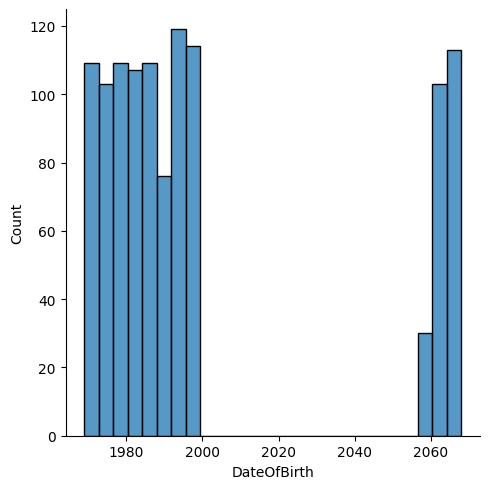

In [10]:
sns.displot(pd.DatetimeIndex(claim['DateOfBirth']).year)

In [11]:
claim['DateOfBirth'] = claim['DateOfBirth'].apply(lambda x : x-pd.DateOffset(years=100) if x.year>2024 else x)

In [12]:
#Answer 3:
claim['claim_amount']=claim['claim_amount'].str.replace("$","").astype('float32')

In [13]:
#Answer 4:
claim['flag'] = np.where(((claim['claim_type']=='Injury only')|(claim['claim_type']=='Material and injury'))&(claim['police_report']=='No'),1,0)

In [14]:
#Answer 5:
claim = claim.groupby('customer_id').first().reset_index(drop = True)

In [15]:
#Answer 6:
catagorical_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","total_policy_claims"]
continious_col = ["claim_amount"]

for col in catagorical_col:
    claim[col] = claim[col].fillna(claim[col].mode()[0])

claim[continious_col] = claim[continious_col].fillna(claim[continious_col].mean())

In [16]:
claim.dropna(inplace=True)

In [17]:
#Answer 7:
claim['age']= pd.to_datetime(claim['claim_date']).dt.year-pd.to_datetime(claim['DateOfBirth']).dt.year


mybin = [0,18,30,60,100]
mybin_label = ['Children','Youth','Adult','Senior']

claim['age_category']= pd.cut(claim['age'],bins=mybin,labels=mybin_label)

In [18]:
#Answer 8:
claim.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12754.951172
Platinum    12368.234375
Silver      12267.349609
Name: claim_amount, dtype: float32

In [19]:
#Answer 9:
claim.loc[claim.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("Total ")

incident_cause
Total Crime                  724333.625
Total Driver error          3263976.750
Total Natural causes        1312474.000
Total Other causes          3724548.750
Total Other driver error    3318471.500
Name: claim_amount, dtype: float32

In [20]:
#Answert 10:
claim.incident_cause.unique()

array(['Driver error', 'Other causes', 'Natural causes',
       'Other driver error', 'Crime'], dtype=object)

In [21]:
mylist_state = ['TX','DE','AK']

claim.loc[(claim.incident_cause.str.lower().str.contains("driver") 
    & (claim.State.isin(mylist_state )==True)),:].groupby('State')['State'].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

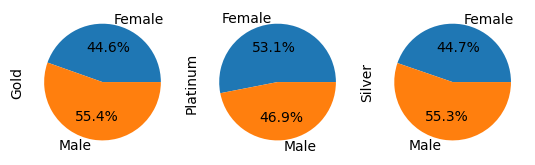

In [22]:
#Asnwer 11:
seg_gen = pd.pivot_table(claim,index='gender',columns='Segment',values='claim_amount',aggfunc=np.sum)

seg_gen.plot(kind = "pie",autopct='%1.1f%%', subplots = True, legend = False)
plt.show()

In [23]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1092
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   float64       
 1   incident_cause       1078 non-null   object        
 2   claim_date           1078 non-null   datetime64[ns]
 3   claim_area           1078 non-null   object        
 4   police_report        1078 non-null   object        
 5   claim_type           1078 non-null   object        
 6   claim_amount         1078 non-null   float32       
 7   total_policy_claims  1078 non-null   float64       
 8   fraudulent           1078 non-null   object        
 9   gender               1078 non-null   object        
 10  DateOfBirth          1078 non-null   datetime64[ns]
 11  State                1078 non-null   object        
 12  Contact              1078 non-null   float64       
 13  Segment              1078 non-null   o

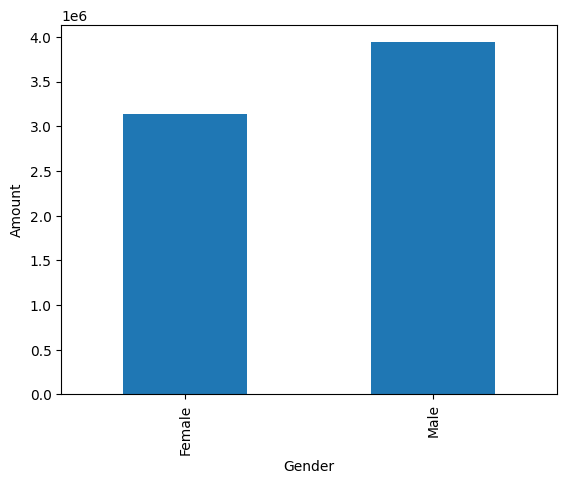

In [24]:
#Answer 12:
claim['incident_cause']=claim['incident_cause'].astype('string')
A12=claim[claim['incident_cause'].isin(['Driver error','Other driver error'])].groupby('gender')['claim_amount'].sum()
A12.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.show()

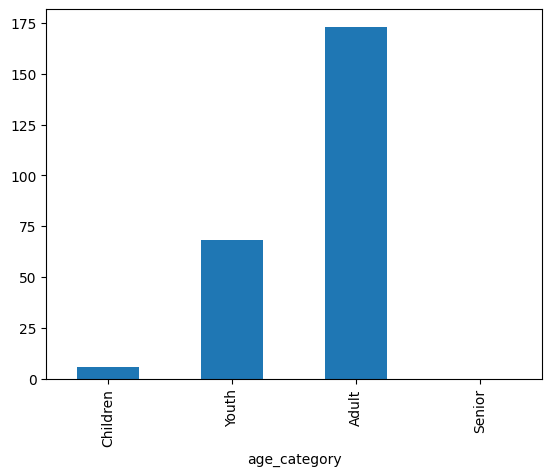

In [25]:
#Answer 13
A13 = claim[claim.fraudulent=='Yes'].groupby('age_category')['claim_id'].count()
A13.plot(kind='bar')
plt.show()

<Axes: xlabel='claim_date', ylabel='Amount'>

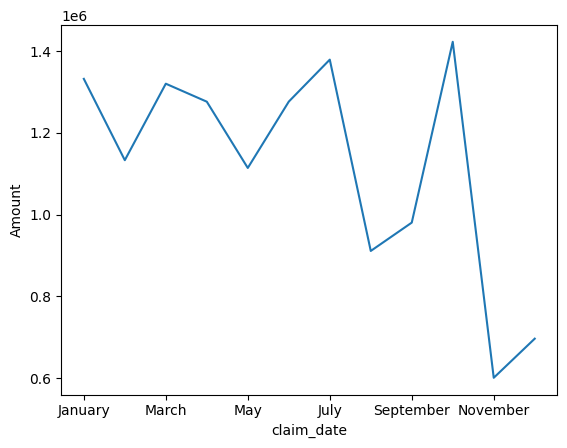

In [26]:
#Answer 14:
monthly_trend = claim.groupby(by=claim.claim_date.dt.strftime('%B'))['claim_amount'].sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend=monthly_trend.reindex(new_order,axis=0)
plt.ylabel('Amount')
monthly_trend.plot(kind='line')

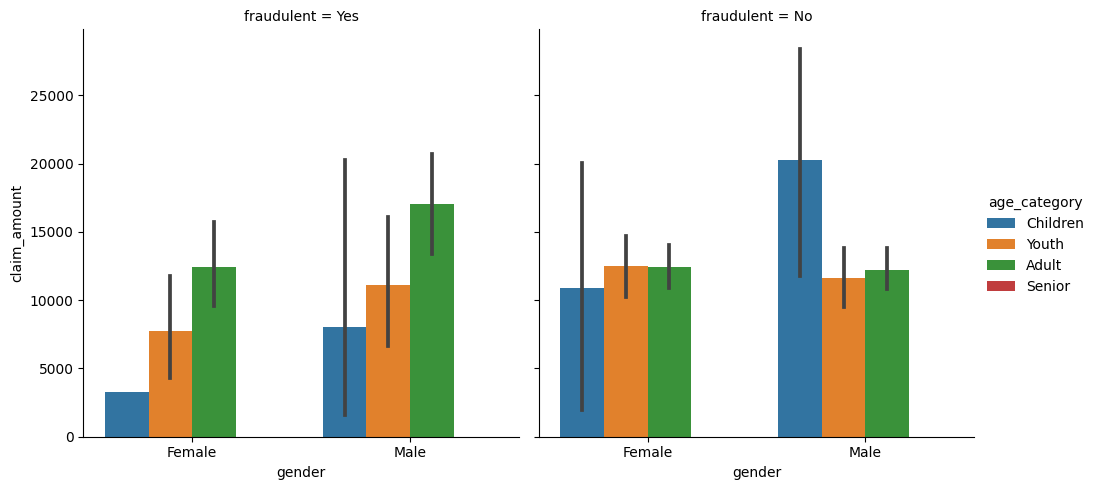

In [37]:
#Answer 15:
sns.catplot(data=claim,x='gender',y='claim_amount',hue='age_category',col="fraudulent", kind="bar")

In [39]:
#Answer 16:
from scipy.stats import ttest_ind
male_amount = claim[claim['gender']=='Male']['claim_amount']
female_amount = claim[claim['gender']=='Female']['claim_amount']

A16 = ttest_ind(male_amount,female_amount)
print('P value= ',A16.pvalue)

if (A16.pvalue)<.05:
    print('Simlarity Found')
else:
    print("No similarity found")


P value=  0.3765998591168217
No similarity found


In [41]:
#Asnwer 17:
from scipy.stats import chi2_contingency
crosstable = pd.crosstab(claim.age_category,claim.Segment)
a17 = chi2_contingency(crosstable)
print('P value= ',a17[1])

if (a17[1])<.05:
    print('Relationship Found')
else:
    print("No Relationship found")

P value=  0.915179217525063
No Relationship found


In [88]:
#Answer 18: Assuming current year is 2018 because max year in claim date is of 2018.
from scipy.stats import ttest_1samp

claim['year']=pd.to_datetime(claim['claim_date']).dt.year
c2018 = claim.loc[claim['year']==2018,['claim_amount']]

a18 = ttest_1samp(c2018,10000)

print(a18.pvalue)
print(c2018.mean())
if a18.pvalue<.05:
    print("There is significant increase")
else:
    print("There is no significant increase")

[1.5354872e-05]
claim_amount    12685.444336
dtype: float32
There is significant increase


In [94]:
claim['age_category'].unique()

['Adult', 'Youth', 'Children']
Categories (4, object): ['Children' < 'Youth' < 'Adult' < 'Senior']

In [100]:
#Answer 19:
from scipy.stats import f_oneway
a1=claim.loc[ claim['age_category'] == 'Adult', 'claim_amount' ]
a2=claim.loc[ claim['age_category'] == 'Youth', 'claim_amount' ]
a3=claim.loc[ claim['age_category'] == 'Children', 'claim_amount' ]

A19 = f_oneway(a1,a2,a3)

print(A19.pvalue)

if A19.pvalue< (.05):
    print("Difference exists")
else:
    print("no diff exists")

0.27613843712067165
no diff exists


In [102]:
#Answer 20:
from scipy.stats import pearsonr
A20 = pearsonr(claim['total_policy_claims'],claim['claim_amount'])

if A20.pvalue< (.05):
    print("Difference exists")
else:
    print("no diff exists")


no diff exists
